# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(-3, 3, 100)
print('first 10 element of x is =',x[:10])
print()
print('Dimension of x is =', np.ndim(x))

first 10 element of x is = [-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545]

Dimension of x is = 1


In [3]:
rng = np.random.RandomState(42) #for making noise
y = np.sin(4*x) + x + rng.uniform(size= len(x))

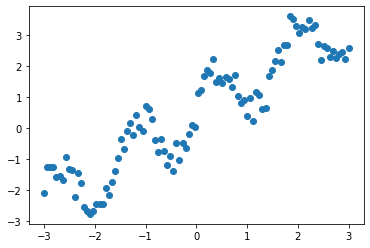

In [37]:
plt.plot(x, y, 'o');

In [5]:
# changing the shape of the x from 1D to 2D for using in sklearn
print('x before adding new axis', x.shape)
x = x[:, np.newaxis]
print('x after adding new axis', x.shape)

x before adding new axis (100,)
x after adding new axis (100, 1)


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [8]:
print('Weight=', regressor.coef_)
print('biyas=', regressor.intercept_)

Weight= [0.94037819]
biyas= 0.47945994533841463


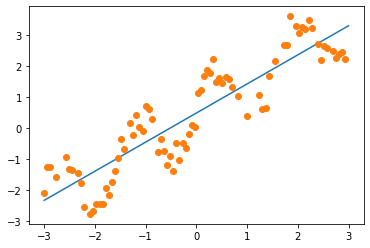

In [9]:
min_pt = x.min() * regressor.coef_[0]+ regressor.intercept_
max_pt = x.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([x.min(), x.max()], [min_pt, max_pt])
plt.plot(x_train, y_train, 'o');

In [10]:
print(regressor.coef_[0])

0.9403781850295023


## Predicting on train data

In [11]:
y_pred_train = regressor.predict(x_train)

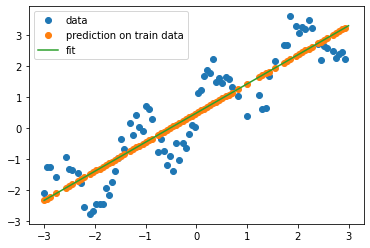

In [12]:
plt.plot(x_train, y_train, 'o', label= 'data')
plt.plot(x_train, y_pred_train, 'o', label='prediction on train data')
plt.plot([x.min(), x.max()], [min_pt, max_pt], label= 'fit')
plt.legend();

## Predicting on test data

In [13]:
y_pred_test = regressor.predict(x_test)

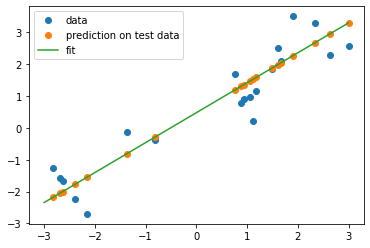

In [14]:
plt.plot(x_test, y_test, 'o', label= 'data')
plt.plot(x_test, y_pred_test, 'o', label='prediction on test data')
plt.plot([x.min(), x.max()], [min_pt, max_pt], label= 'fit')
plt.legend();

In [15]:
regressor.score(x_test, y_test)

0.8584485621538752

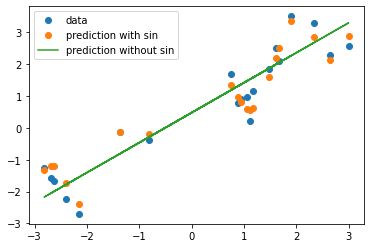

In [16]:
xx_train = np.concatenate((x_train, np.sin(4*x_train)), axis=1)
xx_test = np.concatenate((x_test, np.sin(4*x_test)), axis=1)

regressor.fit(xx_train, y_train)
y_pred_test_sin = regressor.predict(xx_test)

plt.plot(x_test, y_test, 'o', label='data')
plt.plot(x_test, y_pred_test_sin, 'o', label= 'prediction with sin')
plt.plot(x_test, y_pred_test, label='prediction without sin')
plt.legend();

# using KNeighbors

In [17]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=1)

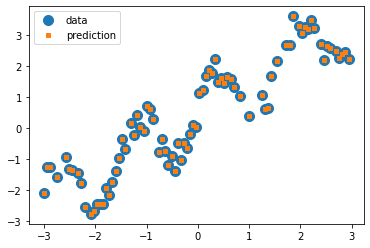

In [31]:
y_pred_train = kneighbor_regression.predict(x_train)

plt.plot(x_train, y_train,'o', label= 'data', markersize= 10)
plt.plot(x_train, y_pred_train,'s', label= 'prediction', markersize= 4)
plt.legend();

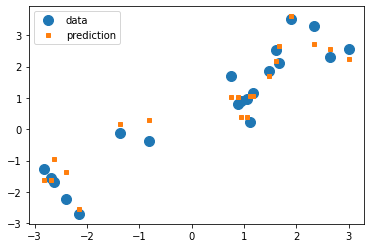

In [32]:
y_pred_test= kneighbor_regression.predict(x_test)

plt.plot(x_test, y_test,'o', label= 'data', markersize= 10)
plt.plot(x_test, y_pred_test,'s', label= 'prediction', markersize= 4)
plt.legend();

In [35]:
print(kneighbor_regression.score(x_test, y_test))

0.9271905801277462
